# Step 1: Understand the dataset

In [1]:
# Import neccessary libraries
import numpy as np  # For numerical operations
import pandas as pd # For data manipulation
#matplotlib and seaborn: For visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

# List all filese in the dataset directory
dataset_dir = '/kaggle/input/predict-online-gaming-behavior-dataset'
print(os.listdir(dataset_dir))

['online_gaming_behavior_dataset.csv']


In [3]:
file_path = '/kaggle/input/predict-online-gaming-behavior-dataset/online_gaming_behavior_dataset.csv'
data = pd.read_csv(file_path)

### Explore the dataset

In [4]:
# Explore the dataset
print(data.head())  # Display the first few rows

   PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                        131           95   

   AchievementsUnlocked EngagementLevel  
0                   

In [5]:
print(data.info())  # Information about columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [6]:
print(data.describe())  # Summary statistics

           PlayerID           Age  PlayTimeHours  InGamePurchases  \
count  40034.000000  40034.000000   40034.000000     40034.000000   
mean   29016.500000     31.992531      12.024365         0.200854   
std    11556.964675     10.043227       6.914638         0.400644   
min     9000.000000     15.000000       0.000115         0.000000   
25%    19008.250000     23.000000       6.067501         0.000000   
50%    29016.500000     32.000000      12.008002         0.000000   
75%    39024.750000     41.000000      17.963831         0.000000   
max    49033.000000     49.000000      23.999592         1.000000   

       SessionsPerWeek  AvgSessionDurationMinutes   PlayerLevel  \
count     40034.000000               40034.000000  40034.000000   
mean          9.471774                  94.792252     49.655568   
std           5.763667                  49.011375     28.588379   
min           0.000000                  10.000000      1.000000   
25%           4.000000                  52.

In [7]:
data.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

# Step 2: Preprocess the Data

Why: Neural networks require clean and normalized data. We handle missing values, encode categorical variables, and scale numeric values.

Actions:

    Handle missing values (if any).
    Encode categorical variables using one-hot encoding.
    Normalize numeric features to a 0-1 range using Min-Max scaling.

In [8]:
data.columns

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')

In [9]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate features and target
x = data.drop('EngagementLevel', axis=1)
y = data['EngagementLevel']

In [10]:
x.columns

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked'],
      dtype='object')

In [11]:
# Identify categorical and numerical columns
cat_columns = x.select_dtypes(include=['object']).columns
num_columns = x.select_dtypes(include=['int64', 'float']).columns

In [12]:
cat_columns

Index(['Gender', 'Location', 'GameGenre', 'GameDifficulty'], dtype='object')

In [13]:
num_columns

Index(['PlayerID', 'Age', 'PlayTimeHours', 'InGamePurchases',
       'SessionsPerWeek', 'AvgSessionDurationMinutes', 'PlayerLevel',
       'AchievementsUnlocked'],
      dtype='object')

In [14]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers = [
        
        ('num', MinMaxScaler(), num_columns), # Scale numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns) # Encode categorical columns
    ]
)

# Transform features
x_preprocessed = preprocessor.fit_transform(x)

# Verify transformation
print(x_preprocessed.shape)

(40034, 22)


In [15]:
x_preprocessed

array([[0.00000000e+00, 8.23529412e-01, 6.77973279e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.49793920e-05, 4.11764706e-01, 2.30248630e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.99587840e-05, 2.05882353e-01, 3.42659158e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99950041e-01, 0.00000000e+00, 9.99780933e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99975021e-01, 5.58823529e-01, 5.84083700e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.17647059e-01, 4.20162861e-01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [16]:
# Unique values in y(target variable)
y.unique()

array(['Medium', 'High', 'Low'], dtype=object)

# Step 3: Split the Data

Why: Splitting the data into training and testing sets helps evaluate the model's performance on unseen data.

In [17]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_preprocessed, y, test_size=0.2, random_state=42)

print(f'Training set size : {x_train.shape}')
print(f'Testing set size : {x_test.shape}')


Training set size : (32027, 22)
Testing set size : (8007, 22)


In [18]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert y_train and y_test to numeric labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

# Convert the numeric labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train_encoded, num_classes=3)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=3)

# Step 4: Build the Neural Network

Why: Neural networks are built layer by layer, with an input layer, hidden layers, and an output layer.

Actions:

    Use TensorFlow and Keras to build the model.
    Use ReLU activation for hidden layers and a softmax activation for the output layer  

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network
model = Sequential([
    Dense(64, activation='relu',  input_dim=x_train.shape[1]), # Input layer
    Dense(32, activation='relu'), # Hidden layer
    Dense(3,activation='softmax') # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,651 (14.26 KB)

 Trainable params: 3,651 (14.26 KB)

 Non-trainable params: 0 (0.00 B)

None


# Step 5: Train the Model

Why: Training optimizes the model parameters using backpropagation and gradient descent.

In [20]:
# Train the model
trained_model = model.fit(x_train, y_train_one_hot, epochs=100, batch_size=32, validation_data=(x_test, y_test_one_hot))

Epoch 1/100
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6494 - loss: 0.8089 - val_accuracy: 0.8346 - val_loss: 0.5112
Epoch 2/100
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8494 - loss: 0.4798 - val_accuracy: 0.8817 - val_loss: 0.4264
Epoch 3/100
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8839 - loss: 0.4228 - val_accuracy: 0.8851 - val_loss: 0.4131
Epoch 4/100
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8931 - loss: 0.3959 - val_accuracy: 0.8908 - val_loss: 0.4087
Epoch 5/100
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8946 - loss: 0.3939 - val_accuracy: 0.8777 - val_loss: 0.4102
Epoch 6/100
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9023 - loss: 0.3779 - val_accuracy: 0.9003 - val_loss: 0.3892
Epoch 7/100
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9010 - loss: 0.3731 - val_accuracy: 0.9038 - val_loss: 0.3832
Epoch 8/100
1001/1001 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9057 - loss: 0

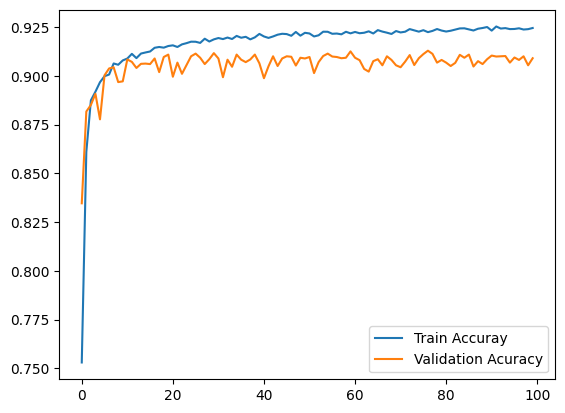

In [21]:
# Plot trained model
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(trained_model.history['accuracy'], label='Train Accuray')
plt.plot(trained_model.history['val_accuracy'], label='Validation Acuracy')
plt.legend()
plt.show()


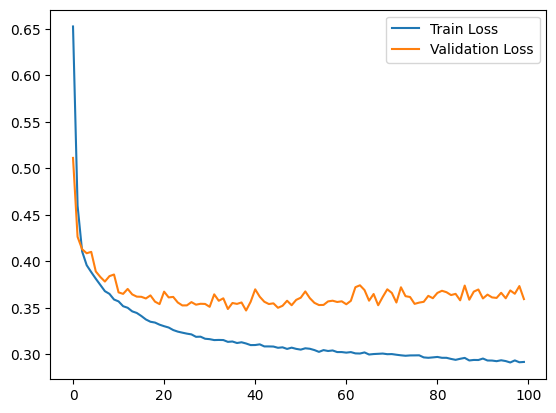

In [22]:
# Loss plot
plt.plot(trained_model.history['loss'], label='Train Loss')
plt.plot(trained_model.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()